In [1]:
import os
import matplotlib.pyplot
import seaborn as sns
import plotly.graph_objects as go
import numpy as np
import pandas as pd

import statsmodels.formula.api as smf

import sklearn 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# See pred

In [2]:
model_names = os.listdir("experiments_results/3-fold_cross_validation")
model_names

['study_2025-05-16_1NN_mean',
 '2025-06-25_07-58__GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-True_amp-liking-True',
 'study_2025-05-29_GAT_liking_3NN',
 '2025-06-23_00-58__GAT_liking_sim_amp_3NN_3ExpNN',
 '2025-06-25_05-01__GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-False',
 '2025-06-25_02-17__GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-True_att-liking-True_amp-liking-False',
 '2025-06-07_15-31__GAT_LR-1.0_bias-True_att-liking-True_amp-liking-True_diss-liking-False_liking2d-False',
 '2025-06-06_09-29__GAT_LR-1.0_bias-False_att-liking-True_amp-liking-False_diss-liking-False_liking2d-False',
 '2025-06-06_08-32__GAT_LR-1.0_bias-False_att-liking-False_amp-liking-False_diss-liking-False_liking2d-False',
 '2025-06-07_11-12__GAT_LR-1.0_bias-True_att-liking-False_amp-liking-False_diss-liking-False_liking2d-False',
 'study_2025-05-29_baseline_randn01',
 '2025-06-07_12-35__GAT_LR-1.0_bias-False_att-liking-False_amp-liking-False_diss-liking-True_liki

In [19]:
pd.read_csv("experiments_results/3-fold_cross_validation/2025-06-25_07-05__GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-True/raw/participant_15/graph_0/model_params_trained.csv",index_col=0)

,src_content_0,att_src_edge_0,src_edge_0,full_src_edge_0,dst_content_0,att_dst_edge_0,dst_edge_0,full_dst_edge_0,att_edge_0,edge_0,full_edge_0,bias_0
0,-0.417033,1.0,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.207396,0.207396,NaN


In [20]:
model_name = "2025-06-25_07-05__GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-True"
# model_name = "2025-06-23_00-58__GAT_liking_sim_amp_3NN_3ExpNN"
participant_id = 17
graph_id = 0
raw_folder_path = os.path.join("experiments_results/3-fold_cross_validation",model_name,"raw")
pred_table_path = os.path.join(raw_folder_path,f"participant_{participant_id}",f"graph_{graph_id}","prediction_table.csv")
print(pred_table_path)

pred_table = pd.read_csv(pred_table_path,index_col = 0)
pred_table.head()

experiments_results/3-fold_cross_validation/2025-06-25_07-05__GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-True/raw/participant_17/graph_0/prediction_table.csv


,pred_values,true_values,train_mask,val_mask
0,0.121002,0.121002,False,False
1,-0.151253,-0.151253,False,False
2,-0.605011,-0.605011,False,False
3,-0.574760,-0.574760,False,False
4,-0.877266,-0.877266,False,False


In [21]:
fig = go.Figure()

fig.add_trace(
    go.Scatter(x = [pred_table[pred_table["train_mask"]+pred_table["val_mask"]]["true_values"].min(),pred_table[pred_table["train_mask"]+pred_table["val_mask"]]["true_values"].max()],
               y = [pred_table[pred_table["train_mask"]+pred_table["val_mask"]]["true_values"].min(),pred_table[pred_table["train_mask"]+pred_table["val_mask"]]["true_values"].max()],
               name = "truth",
               mode = "lines")
)

fig.add_trace(
    go.Scatter(x = pred_table[pred_table["train_mask"]]["true_values"],
               y = pred_table[pred_table["train_mask"]]["pred_values"],
               name = "training",
               mode = "markers")
)

fig.add_trace(
    go.Scatter(x = pred_table[pred_table["val_mask"]]["true_values"],
               y = pred_table[pred_table["val_mask"]]["pred_values"],
               name = "validation",
               mode = "markers")
)



fig

In [22]:
pred_table[pred_table["val_mask"]]["pred_values"].std(), pred_table[pred_table["val_mask"]]["true_values"].std()

(nan, nan)

# History

5 0


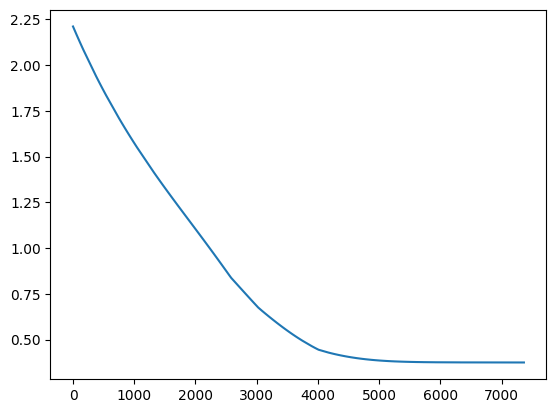

In [23]:
history_path = os.path.join(raw_folder_path,f"participant_{29}",f"graph_{graph_id}","history.csv")
history = pd.read_csv(history_path,index_col = 0)
history

plt.plot([float(x[len("tensor("):-1]) for x in history["train_mae"]])
plt.plot([float(x[len("tensor("):-1]) for x in history["val_mae"]])

print(pred_table["train_mask"].sum(),pred_table["val_mask"].sum())

# Clustering for depression

In [25]:
model_name = "2025-06-25_07-05__GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-True"
participant_id = 1
graph_id = 0

processed_folder_path = os.path.join("experiments_results/3-fold_cross_validation",model_name,"processed")
overall_summaries_path = os.path.join(processed_folder_path,"overall_summaries.csv")
print(overall_summaries_path)

overall_summaries = pd.read_csv(overall_summaries_path,index_col = 0)
overall_summaries.head()

experiments_results/3-fold_cross_validation/2025-06-25_07-05__GAT_liking_sim_amp_3NN_3ExpNN_no_val_bias-False_att-liking-False_amp-liking-True/processed/overall_summaries.csv


,model.device,model.update_node_module.name,model.update_node_module.parameters.add_self_loops,model.update_node_module.parameters.bias,model.update_node_module.parameters.concat,model.update_node_module.parameters.dropout,model.update_node_module.parameters.dst_content_mask.0,model.update_node_module.parameters.dst_content_require_grad,model.update_node_module.parameters.dst_content_weight_initializer,model.update_node_module.parameters.dst_edge_mask.0,...,src_edge_0_trained,full_src_edge_0_trained,dst_content_0_trained,att_dst_edge_0_trained,dst_edge_0_trained,full_dst_edge_0_trained,att_edge_0_trained,edge_0_trained,full_edge_0_trained,bias_0_trained
0,cuda,MyGATConv,False,False,True,0.0,False,True,glorot,False,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.294976,0.294976,NaN
1,cuda,MyGATConv,False,False,True,0.0,False,True,glorot,False,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,-2.086369,-2.086369,NaN
2,cuda,MyGATConv,False,False,True,0.0,False,True,glorot,False,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.643253,0.643253,NaN
3,cuda,MyGATConv,False,False,True,0.0,False,True,glorot,False,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.789400,0.789400,NaN
4,cuda,MyGATConv,False,False,True,0.0,False,True,glorot,False,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,-1.509002,-1.509002,NaN


In [26]:
folder_path = f"experiments_results/3-fold_cross_validation/{model_name}/processed"
overall_summaries = pd.read_csv(os.path.join(folder_path,"overall_summaries.csv"),index_col=0)
overall_summaries["participant_id"] = overall_summaries["participant_folder_name"].apply(lambda x: int(x.split("_")[1]))

participant_data = pd.read_csv("data/processed/participant_data.csv",index_col=0)
participant_data["participant_id"] = participant_data["participant"]
participant_data.drop(["participant"],axis=1,inplace=True)
participant_data

data = pd.merge(participant_data,overall_summaries,on="participant_id",how="right")
data[["depression","depressionCont","src_edge_0_trained", "src_content_0_trained", "edge_0_trained", "bias_0_trained"]]

,depression,depressionCont,src_edge_0_trained,src_content_0_trained,edge_0_trained,bias_0_trained
0,1,37,NaN,-0.111075,0.294976,NaN
1,1,15,NaN,2.209804,-2.086369,NaN
2,1,45,NaN,-0.055096,0.643253,NaN
3,1,21,NaN,-0.029481,0.789400,NaN
4,1,36,NaN,-0.733492,-1.509002,NaN
...,...,...,...,...,...,...
99,0,7,NaN,0.860850,0.855573,NaN
100,0,12,NaN,-0.373109,-0.963878,NaN
101,1,31,NaN,-0.471264,-0.378190,NaN
102,1,42,NaN,-0.916778,1.347253,NaN


In [28]:
fig = go.Figure()

fig.add_trace(
    go.Histogram(
        x = data["src_edge_0_trained"],
        name="src_edge_0_trained"
    )
)

fig.add_trace(
    go.Histogram(
        x = data["src_content_0_trained"],
        name="src_content_0_trained"
    )
)

fig.add_trace(
    go.Histogram(
        x = data["edge_0_trained"],
        name="edge_0_trained"
    )
)

fig.add_trace(
    go.Histogram(
        x = data["bias_0_trained"],
        name="bias_0_trained"
    )
)

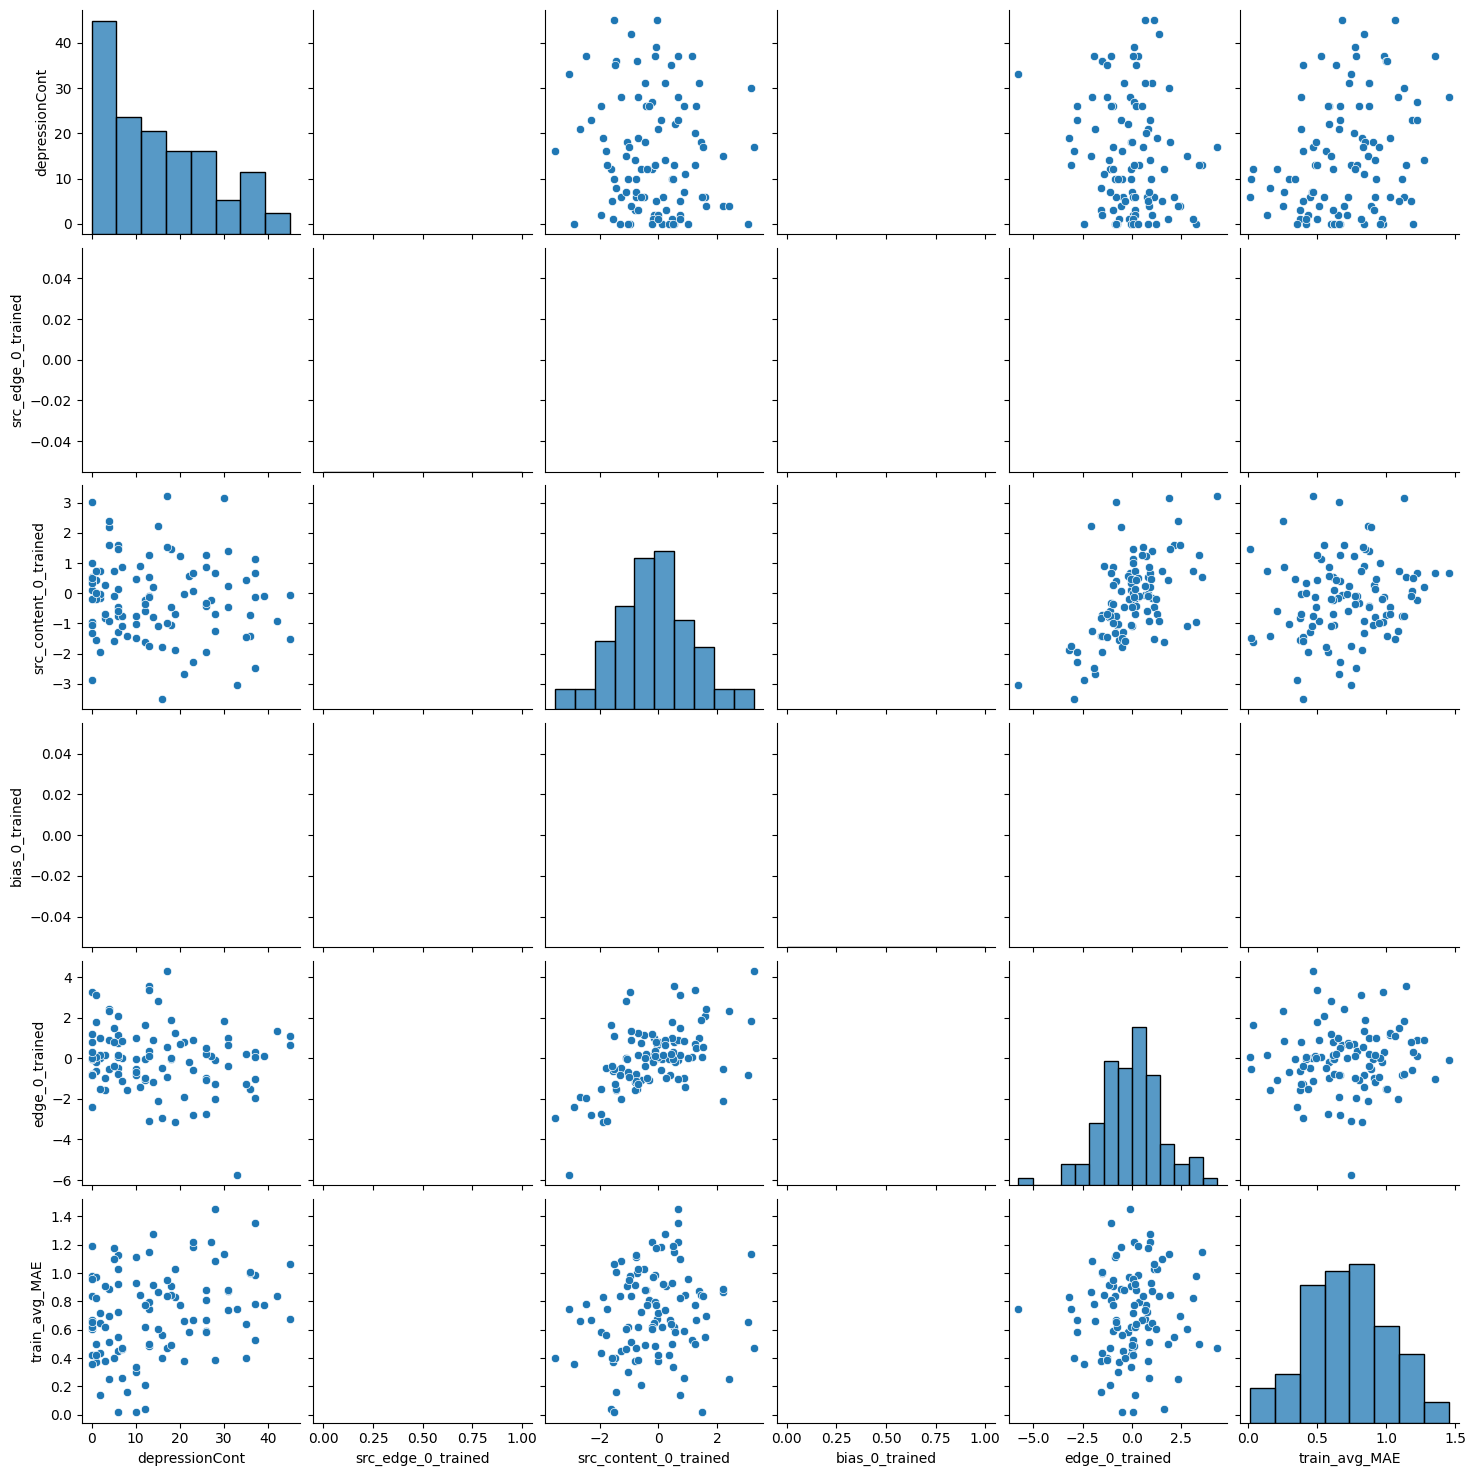

In [29]:
sns.pairplot(data[["depressionCont","src_edge_0_trained","src_content_0_trained","bias_0_trained","edge_0_trained","train_avg_MAE"]])

In [30]:
data[["depressionCont","src_edge_0_trained","src_content_0_trained","bias_0_trained","edge_0_trained"]].corr()

from scipy.stats import pearsonr, spearmanr

In [32]:
var_names = ["depressionCont","n_not_experienced","train_avg_MAE","src_edge_0_trained","src_content_0_trained","bias_0_trained","edge_0_trained"]

corr = []
p_values = []
for v_name in var_names:
    r,p = pearsonr(data[var_names].values,data[[v_name]].values)
    corr.append(r)
    p_values.append(p)

text = np.round(corr,3).astype(str)
p_values = np.round(p_values,3).astype(str)

for i in range(text.shape[0]):
    for j in range(text.shape[1]):
        text[i,j] = text[i,j] + " - p:" + p_values[i,j]


fig = go.Figure(data=go.Heatmap(
                    z= corr,
                    x = var_names,
                    y = var_names,
                    text= text,
                    texttemplate="%{text}",
                    textfont={"size":20}))
fig.update
fig.show()

In [33]:
var_names = ["depressionCont","n_not_experienced","train_avg_MAE","src_edge_0_trained","src_content_0_trained","bias_0_trained","edge_0_trained"]
r,p = spearmanr(data[var_names])


text = np.round(r,3).astype(str)
p_values = np.round(p,3).astype(str)

for i in range(text.shape[0]):
    for j in range(text.shape[1]):
        text[i,j] = text[i,j] + " - p:" + p_values[i,j]

fig = go.Figure(data=go.Heatmap(
                    z=r,
                    x = var_names,
                    y = var_names,
                    text=text,
                    texttemplate="%{text}",
                    textfont={"size":20}))
fig.update
fig.show()

"2025-06-23_23-21__GAT_liking_sim_amp_3NN_3ExpNN_no_val" doesn't show clear trend between depressionCont and any of src_edge_0_trained, src_content_0_trained, bias_0_trained and edge_trained. There may be one with src_edge_0_trained (spearman = -0.0876, p = 0.0672; pearson = -0.0875, p = 0.0964). Some correlations appears between src_content_0_trained, edge_0_trained and bias_0_trained. This argues for removing some parameters - maybe one by one - maybe src_content_0_trained which is "correlating" the most.

Alternatively, dimensionality reduction applied to src_edge_0_trained, src_content_0_trained, bias_0_trained and edge_traine before classification could help.

In [34]:
data

,depression,depressionCont,female,age,n_not_experienced,participant_id,model.device,model.update_node_module.name,model.update_node_module.parameters.add_self_loops,model.update_node_module.parameters.bias,...,src_edge_0_trained,full_src_edge_0_trained,dst_content_0_trained,att_dst_edge_0_trained,dst_edge_0_trained,full_dst_edge_0_trained,att_edge_0_trained,edge_0_trained,full_edge_0_trained,bias_0_trained
0,1,37,0,32,4,88,cuda,MyGATConv,False,False,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.294976,0.294976,NaN
1,1,15,0,39,2,50,cuda,MyGATConv,False,False,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,-2.086369,-2.086369,NaN
2,1,45,1,31,12,49,cuda,MyGATConv,False,False,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.643253,0.643253,NaN
3,1,21,0,27,4,35,cuda,MyGATConv,False,False,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.789400,0.789400,NaN
4,1,36,1,23,20,26,cuda,MyGATConv,False,False,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,-1.509002,-1.509002,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,0,7,0,48,4,71,cuda,MyGATConv,False,False,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,0.855573,0.855573,NaN
100,0,12,1,29,9,1,cuda,MyGATConv,False,False,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,-0.963878,-0.963878,NaN
101,1,31,1,33,8,22,cuda,MyGATConv,False,False,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,-0.378190,-0.378190,NaN
102,1,42,1,39,9,25,cuda,MyGATConv,False,False,...,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.347253,1.347253,NaN


In [ ]:
results = smf.ols("depressionCont ~ n_not_experienced * src_content_0_trained * edge_0_trained", data=data).fit()
print("== results.summary() ==\n\n",results.summary(),"\n\n == end summary ==")

== results.summary() ==

                             OLS Regression Results                            
Dep. Variable:         depressionCont   R-squared:                       0.219
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     1.646
Date:                Wed, 25 Jun 2025   Prob (F-statistic):             0.0777
Time:                        11:07:32   Log-Likelihood:                -397.49
No. Observations:                 104   AIC:                             827.0
Df Residuals:                      88   BIC:                             869.3
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

"2025-06-23_23-21__GAT_liking_sim_amp_3NN_3ExpNN_no_val" r2 = 0.187 with depressionCont ~ n_not_experienced * src_edge_0_trained * src_content_0_trained * edge_0_trained * bias_0_trained

src_content_0_trained                                                                       -7.5368      2.778     -2.713      0.007 

n_not_experienced:src_content_0_trained                                                      0.7426      0.312      2.378      0.018 

n_not_experienced:bias_0_trained                                                            -0.5171      0.263     -1.964      0.050 

The higher the bias the less likely depressed. The highest the src_content param, the less likely depressed.

The parameter n_not_experienced is a moderator. Hard to tell from this what happens when n_not_experienced increases. But we know that it correlates with depressionCont (spearman 0.18, pearson 0.274).



depressionCont ~ train_avg_MAE * n_not_experienced * src_edge_0_trained * src_content_0_trained * edge_0_trained * bias_0_trained

reaches r2 = 0.338

Likewise, train_avg_MAE should be studied as a moderator. This vouches for some structural equation modelling. Additionally check the best model for each participant so that train_avg_MAE is not required: just take the best model. 

Text(0, 0.5, 'Within Cluster Sum of Squares')

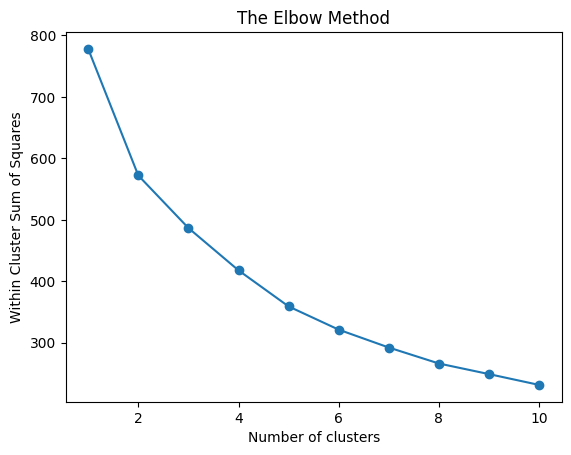

In [84]:

X = data[["src_edge_0_trained", "src_content_0_trained", "edge_0_trained", "bias_0_trained"]]
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i,max_iter=300,n_init=10,random_state=0)
    km=kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure()
plt.plot(range(1,11),wcss, marker="o")

plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of Squares')

In [73]:
from sklearn.decomposition import PCA


#visualizing the 6 clusters in 2 dimensions with 2 principal componenets
#reducing data to 2 prinicipal components
pca_2comp=PCA(n_components=2)
df_reduced_2comp=pca_2comp.fit_transform(X)

# running Kmeans for 6 clusters on 2 PC's
kmeans_pca_2comp=KMeans(n_clusters=4)
reduced_cluster_labels_2comp=kmeans_pca_2comp.fit_predict(df_reduced_2comp)
centers_2comp=kmeans_pca_2comp.cluster_centers_

#creating dataframes for cluster labels and 2 PC's
predictions=pd.DataFrame(reduced_cluster_labels_2comp,columns=['cluster_pred'])
reduced_df_2comp=pd.DataFrame(np.round(df_reduced_2comp,4),columns=['Dimension 1','Dimension 2'])

# concatanete the above two dfs
to_plot=pd.concat([predictions,reduced_df_2comp,data[["depression"]]], axis=1)

In [74]:
to_plot

,cluster_pred,Dimension 1,Dimension 2,depression
0,0,-1.8254,-1.4497,1
1,2,-1.0130,0.3030,1
2,2,-0.1817,0.1925,1
3,3,0.4808,-0.6984,1
4,0,-2.4086,-0.2209,1
...,...,...,...,...
357,0,-1.8739,0.4003,1
358,0,-1.1449,-0.1038,1
359,2,-0.3177,1.2282,1
360,2,-0.1845,0.4437,1


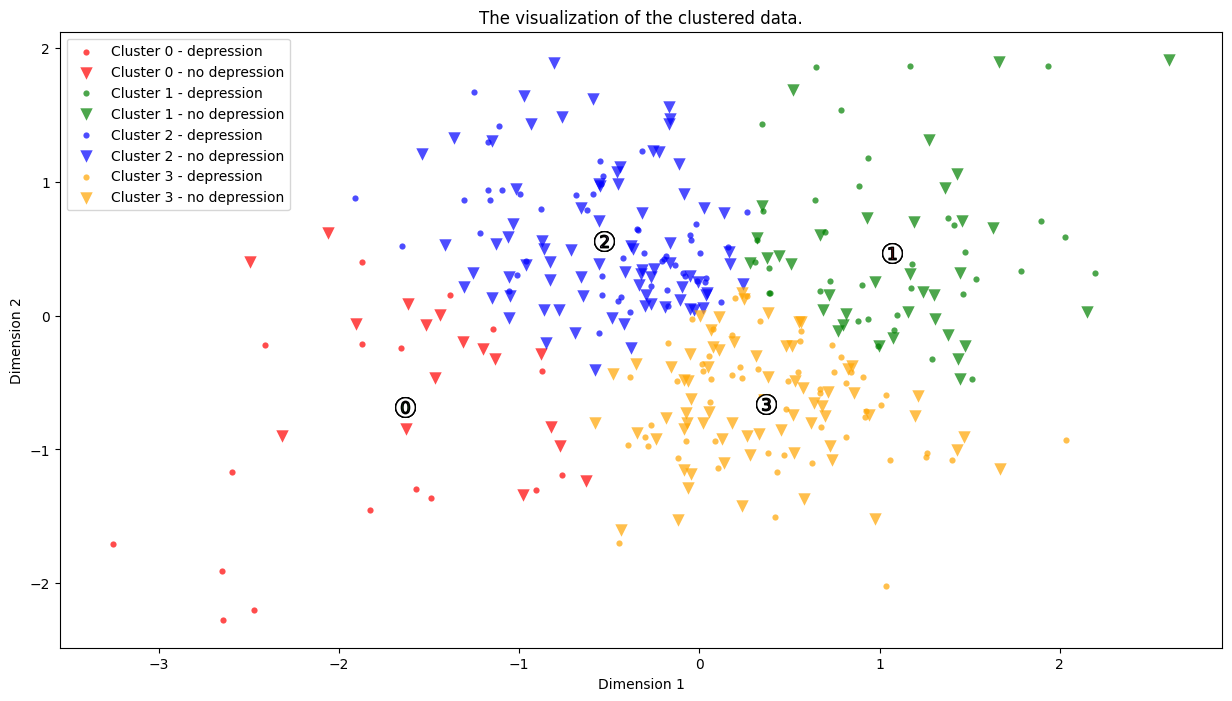

In [76]:
plt.figure(figsize=(15,8))
ax=plt.subplot()

colors=['red','green','blue','orange','yellow','purple']
n_clusters = 4
centers = centers_2comp
for n_clusters in range(n_clusters):
        
    # colors = cm.nipy_spectral((to_plot['Cluster_pred']== n_clusters).astype(float) / n_clusters)
        #colors=['red','green','blue','orange','yellow','purple']
    

    # not depression
    cluster_mask = to_plot['cluster_pred'] == n_clusters
    depression_mask  = to_plot['depression'] == 1
    ax.scatter(to_plot[cluster_mask*depression_mask]["Dimension 1"],to_plot[cluster_mask*depression_mask]["Dimension 2"],
        marker='.', 
        s=80, lw=0, alpha=0.7,
        c=colors[n_clusters], 
        edgecolor='black', 
        label='Cluster %d - depression'%n_clusters)

    ax.scatter(to_plot[cluster_mask*(~depression_mask)]["Dimension 1"],to_plot[cluster_mask*(~depression_mask)]["Dimension 2"],
        marker='v', 
        s=80, lw=0, alpha=0.7,
        c=colors[n_clusters], 
        edgecolor='black', 
        label='Cluster %d - no depression'%n_clusters)
            
    # Draw white circles at cluster centers
        

    for i, c in enumerate(centers):
           
        ax.scatter(c[0], c[1], marker='o',
                        c="white", alpha=1, s=200, edgecolor='k')
        ax.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                            s=80, edgecolor='k')

ax.set_title("The visualization of the clustered data.")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")

plt.legend()    
plt.show()

[0.92960973 0.02864859 0.02043299 0.01349978 0.0078089 ]


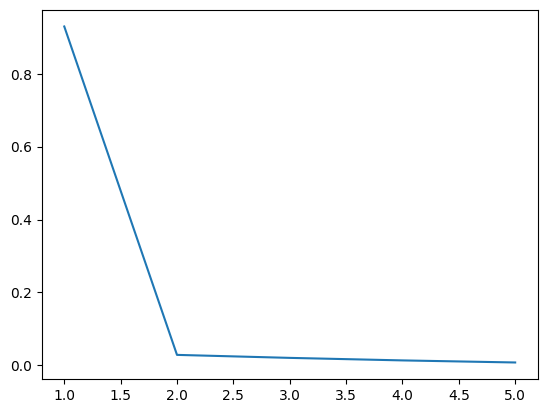

In [114]:
param_names = ["src_edge_0_trained", "src_content_0_trained", "edge_0_trained", "bias_0_trained", "n_not_experienced"]

pca = PCA(n_components=len(param_names), svd_solver='full')
pca.fit(data[param_names])
print(pca.explained_variance_ratio_)
plt.plot(np.arange(1,len(param_names)+1),pca.explained_variance_ratio_)

In [104]:
pca = PCA(n_components=5, svd_solver='full')
pca.fit(data[param_names])
print(pca.explained_variance_ratio_)
new_X = pca.transform(data[param_names])
new_X = pd.DataFrame(new_X,columns=[f"dim_{i}" for i in range(new_X.shape[-1])])
new_data = new_X.copy()
new_data["depressionCont"] = data["depressionCont"].copy()
new_data["n_not_experienced"] = data["n_not_experienced"].copy()

results = smf.ols("depressionCont ~ dim_0 * dim_1 * dim_2 * dim_3 * dim_4", data=new_data).fit()
print("== results.summary() ==\n\n",results.summary(),"\n\n == end summary ==")

[0.92960973 0.02864859 0.02043299 0.01349978 0.0078089 ]
== results.summary() ==

                             OLS Regression Results                            
Dep. Variable:         depressionCont   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.099
Method:                 Least Squares   F-statistic:                     2.284
Date:                Tue, 24 Jun 2025   Prob (F-statistic):           0.000193
Time:                        12:38:34   Log-Likelihood:                -1394.3
No. Observations:                 362   AIC:                             2853.
Df Residuals:                     330   BIC:                             2977.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

"2025-06-23_23-21__GAT_liking_sim_amp_3NN_3ExpNN_no_val" r2 = 0.199 with depressionCont ~ n_not_experienced * dim_0 * dim_1 * dim_2 * dim_3

a bit of improvement but no dimension reduction... Maybe because PCA decorrelate the variables.

In [90]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Sankey(
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["A1", "A2", "B1", "B2", "C1", "C2"],
      color = "blue"
    ),
    link = dict(
      source = [0, 1, 0, 2, 3, 3],
      target = [2, 3, 3, 4, 4, 5],
      value = [8, 4, 2, 8, 4, 3],
      hovercolor=["midnightblue", "lightskyblue", "gold", "mediumturquoise", "lightgreen", "cyan"],
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

# Next steps

Hyp:

0 - underestimation: low bias x depression

1 - narrow generalization in depth (vertical) (neg src_content x depression)

2 - narrow generalization across (horizontal) (use of high edge_0_trained x depression = stick to similar, and high src_edge_0_trained -x depression = attention to negative stimuli)

## "2025-06-23_23-21__GAT_liking_sim_amp_3NN_3ExpNN_no_val" 

Some preliminary results for src_content_0_trained (hyp 1) and bias_0_trained (hyp 0). Both negative, which foster India's first hypothesis.

There is no use for edge_0_trained and src_edge_0_trained... This contradict hypothesis 2... It may not work for edge_0_trained because similarity is already low predictor of liking AND the graph structure is already constrained by similarity. Increasing the number of connections in the graph may change that pattern for both parameters.

- (TODO): Do without leap and only 1st degree 

- (TODO): Increase number of connections not exp to exp

It may not work for src_edge_0_trained because the other parameters are already doing the work... See without it.

- TODO: n_not_experienced is used as moderator... Do a full mediation x moderation analysis to check the underlying structure

depression => +n_not_experienced => +bias vs depression, (n_not_experienced) => +bias

CAREFUL: even for those parameters, should check whether I can retrieve them on a same participant_graph from new initializations .

- TODO: There are a lot of correlations between parameters. This is unwanted because it shows overidentification (two params that counteract / thwart each other). TODO: factor design to see which parameters are more essential.

PCA didn't contradict the use of those 4 though.


train_avg_MAE correlates with train_avg_MAE "2025-06-07_15-31__GAT_LR-1.0_bias-True_att-liking-True_amp-liking-True_diss-liking-False_liking2d-False" - (pearson 0.849 p<1e-3; spearman 0.856 p<1e-3)

On average train_avg_MAE is improved of 0.051 compared to "2025-06-07_15-31__GAT_LR-1.0_bias-True_att-liking-True_amp-liking-True_diss-liking-False_liking2d-False"


- TODO: check BIC (well same number of params)

- TODO: train_avg_MAE as moderator + the fact that it increases the prediction of depressionCont may insist that for some participants that model is not good at all and those participants should be removed from the analysis.

- TODO: check per participant which is the best model + detect outliers (come together because if baseline work, it's that they don't do anything and should be removed...) This will also clean the regression analysis.


## Next model